<a href="https://colab.research.google.com/github/Vothuw/homeworkAl/blob/main/Flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Chuẩn hóa pixel về [0, 1]
data = ImageDataGenerator(rescale=1.0/255)

# Load ảnh từ thư mục -> batch
generator = data.flow_from_directory(
    '/content/drive/MyDrive/hoa',
    target_size=(32, 32),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True
)

# Load dữ liệu kiểm tra
test_generator = data.flow_from_directory(
    '/content/drive/MyDrive/hoa',
    target_size=(32, 32),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=10000,
    shuffle=False
)

class_labels = ['hoa Sung', 'hoa hong', 'hoa huong duong', 'hoa tulip', 'hoa van tho']
X_batch, y_batch = next(generator)
X_batch_flat = X_batch.reshape(X_batch.shape[0], -1)


x_train, y_train = next(generator)
x_test, y_test = next(test_generator)
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

model = Sequential([
    Dense(256, activation='relu', input_shape=(32*32*3,)),
    Dense(128, activation='relu'),
    Dense(len(class_labels), activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=10000, batch_size=32, validation_data=(x_test, y_test))

In [ ]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print('test_acc:%.2f'%(test_acc*100))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6603 - loss: 2.4490
test_acc:63.00


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Dự đoán là: hoa sung


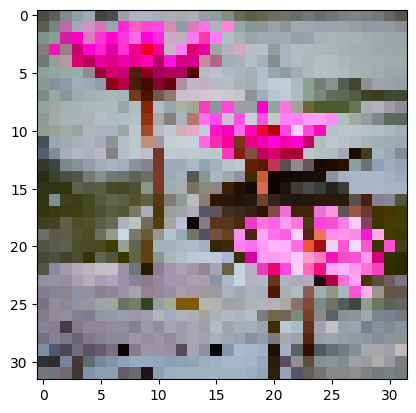

In [ ]:
image_path = '/content/drive/MyDrive/hoa/hoa Sung/sung1.jpg'
img = load_img(image_path, target_size=(32, 32))
plt.imshow(img)
img_array = img_to_array(img) / 255.0
img_flatten = img_array.reshape(1, 32*32*3)
y_pred_prob = model.predict(img_flatten)
predicted_index = np.argmax(y_pred_prob)
class_labels = ['hoa sung', 'hoa hong', 'hoa huong duong', 'hoa tulip', 'hoa van tho'] # 0 1 2 3 4
print("Dự đoán là:", class_labels[predicted_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Dự đoán là: hoa hong


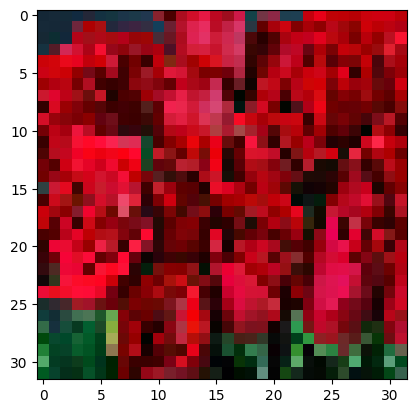

In [ ]:
image_path = '/content/drive/MyDrive/hoa/hoa hong/rose3.jpg'
img = load_img(image_path, target_size=(32, 32))
plt.imshow(img)
img_array = img_to_array(img) / 255.0
img_flatten = img_array.reshape(1, 32*32*3)
y_pred_prob = model.predict(img_flatten)
predicted_index = np.argmax(y_pred_prob)
class_labels = ['hoa sung', 'hoa hong', 'hoa huong duong', 'hoa tulip', 'hoa van tho'] # 0 1 2 3 4
print("Dự đoán là:", class_labels[predicted_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Dự đoán là: hoa tulip


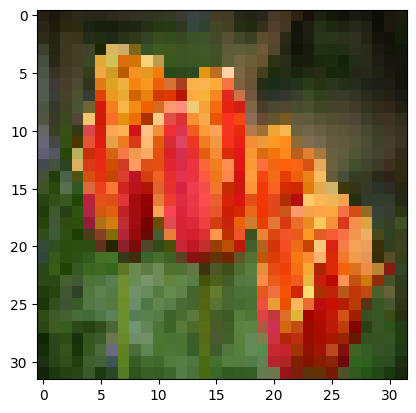

In [ ]:
image_path = '/content/drive/MyDrive/hoa/hoa tulip/lip6.jpg'
img = load_img(image_path, target_size=(32, 32))
plt.imshow(img)
img_array = img_to_array(img) / 255.0
img_flatten = img_array.reshape(1, 32*32*3)
y_pred_prob = model.predict(img_flatten)
predicted_index = np.argmax(y_pred_prob)
class_labels = ['hoa sung', 'hoa hong', 'hoa huong duong', 'hoa tulip', 'hoa van tho'] # 0 1 2 3 4
print("Dự đoán là:", class_labels[predicted_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Dự đoán là: hoa van tho


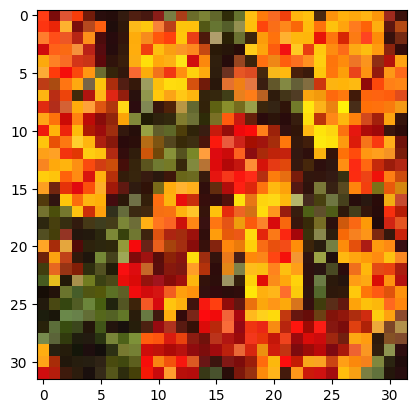

In [ ]:
image_path = '/content/drive/MyDrive/hoa/hoa van tho/tho18.jpg'
img = load_img(image_path, target_size=(32, 32))
plt.imshow(img)
img_array = img_to_array(img) / 255.0
img_flatten = img_array.reshape(1, 32*32*3)
y_pred_prob = model.predict(img_flatten)
predicted_index = np.argmax(y_pred_prob)
class_labels = ['hoa sung', 'hoa hong', 'hoa huong duong', 'hoa tulip', 'hoa van tho'] # 0 1 2 3 4
print("Dự đoán là:", class_labels[predicted_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Dự đoán là: hoa huong duong


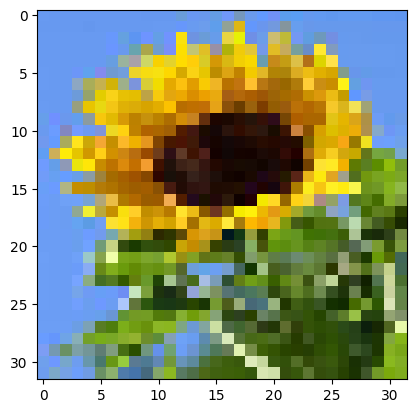

In [ ]:
image_path = '/content/drive/MyDrive/hoa/hoa huong duong/sun13.jpg'
img = load_img(image_path, target_size=(32, 32))
plt.imshow(img)
img_array = img_to_array(img) / 255.0
img_flatten = img_array.reshape(1, 32*32*3)
y_pred_prob = model.predict(img_flatten)
predicted_index = np.argmax(y_pred_prob)
class_labels = ['hoa sung', 'hoa hong', 'hoa huong duong', 'hoa tulip', 'hoa van tho'] # 0 1 2 3 4
print("Dự đoán là:", class_labels[predicted_index])

In [ ]:
model.save('hoa.h5')

In [ ]:
from keras.models import load_model

# Load mô hình đã lưu
model = load_model('/content/hoa.h5')
